+ Maybe with samaller samples adding on every iteration CEAL helps more

In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score
import os
import sys
module_path = "../src"
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
#os.environ["WANDB_SILENT"] = "true" # Environment Variable to make wandb silent
if module_path not in sys.path:
    sys.path.append(module_path)
# 1. General Libraries
import pandas as pd
import numpy as np
from pathlib import Path
import yaml
from pytorch_lightning.callbacks import ModelCheckpoint,EarlyStopping
from pytorch_lightning import Trainer

# 2. DataModule & Class Libraries
from utils.ModelPrediction import get_prediction,get_probs,run_metrics
from utils.calc_stat import calc_dataset_mean_std
from utils.ActiveLearning import get_confidence_samples,get_uncertain_samples,calc_uncertainty
from utils.FeatureExtractor import evaluate_projection
from dataset.ImageDataModule import ImageDataModule
from dataset.ImageDataset import ImageDataset, EvalImageDataset
from models.ResNetClass import ResNetClass
from utils.label_encoder import label_encoder_target
# 3. Pytorch & Pytorch Lightning Libraries
from torchvision import transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
from tqdm.notebook import tqdm
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
# 4. Wandb Tracker Exp

In [7]:
def get_train_transf(mean,std):
    return  transforms.Compose([
                        transforms.ToPILImage(),
                        transforms.Resize((256, 256)),
                        transforms.RandomHorizontalFlip(p=0.5),
                        transforms.RandomRotation(15),
                        transforms.CenterCrop((224,224)),
                        transforms.ToTensor(),
                        transforms.Normalize(mean,std)
                    ])
def get_valid_transf(mean,std):

    return  transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((224, 224)),
                    transforms.ToTensor(),
                    transforms.Normalize(mean,std)
                    ])

en True 500
*****  Iteration 0  *****
Number of Training Samples: 503



Mean of the Dataset: tensor([0.6696, 0.6646, 0.6657]), Std of the Dataset: tensor([0.3688, 0.3691, 0.3726]) 


GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 59.61002731323242,val_avg_loss: 1.596260905265808 


acc_val_epoch: 73.46796417236328,val_avg_loss: 1.4377765655517578 


acc_val_epoch: 77.29804992675781,val_avg_loss: 1.288357138633728 


acc_val_epoch: 78.62117004394531,val_avg_loss: 1.150398850440979 


acc_val_epoch: 80.43175506591797,val_avg_loss: 1.0191508531570435 


acc_val_epoch: 81.54595947265625,val_avg_loss: 0.9166727662086487 


acc_val_epoch: 82.86907958984375,val_avg_loss: 0.8187427520751953 


acc_val_epoch: 85.16712951660156,val_avg_loss: 0.7343707084655762 


acc_val_epoch: 86.3509750366211,val_avg_loss: 0.677550196647644 


acc_val_epoch: 86.62952423095703,val_avg_loss: 0.6331675052642822 


acc_val_epoch: 86.83843994140625,val_avg_loss: 0.5928285717964172 


acc_val_epoch: 87.04735565185547,val_avg_loss: 0.5650310516357422 


acc_val_epoch: 88.0919189453125,val_avg_loss: 0.535619854927063 


acc_val_epoch: 87.95264434814453,val_avg_loss: 0.5096328854560852 


acc_val_epoch: 88.23119354248047,val_avg_loss: 0.49382108449935913 


acc_val_epoch: 88.37047576904297,val_avg_loss: 0.4739173948764801 


acc_val_epoch: 88.50975036621094,val_avg_loss: 0.468071848154068 


acc_val_epoch: 88.50975036621094,val_avg_loss: 0.4614078104496002 


acc_val_epoch: 89.13648986816406,val_avg_loss: 0.45209288597106934 


acc_val_epoch: 89.20612335205078,val_avg_loss: 0.4368581771850586 


acc_val_epoch: 89.4150390625,val_avg_loss: 0.43348413705825806 


acc_val_epoch: 89.34540557861328,val_avg_loss: 0.4270913004875183 


acc_val_epoch: 89.20612335205078,val_avg_loss: 0.42141851782798767 


acc_val_epoch: 89.62395477294922,val_avg_loss: 0.42165935039520264 


acc_val_epoch: 89.62395477294922,val_avg_loss: 0.42627862095832825 


acc_val_epoch: 89.20612335205078,val_avg_loss: 0.42720338702201843 


acc_val_epoch: 89.48468017578125,val_avg_loss: 0.4279671311378479 


acc_val_epoch: 89.4150390625,val_avg_loss: 0.43664899468421936 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 89.69718170166016
              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86       133
         1.0       0.95      0.94      0.95      1102
         2.0       0.94      0.90      0.92       628
         3.0       0.72      0.60      0.66       159
         4.0       0.92      0.96      0.94       709
         5.0       0.46      0.62      0.53       142

    accuracy                           0.90      2873
   macro avg       0.82      0.81      0.81      2873
weighted avg       0.90      0.90      0.90      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.8094172853928446,
 'Macro F1-Score': 0.8092223037528997,
 'Macro Precision': 0.8152052000957282,
 'Macro Recall': 0.8094172853928446,
 'test_acc': tensor(89.6972, device='cuda:0'),
 'test_loss': tensor(0.4326, device='cuda:0')}
---------------------------------------------------------------------


Using Entropy
Number of Human label samples:  500
Number of PseudoLabels:  62
Acc Pseudo:  1.0
Using CEAL algorithm
DELTA: 0.019967000000000002
*****  Iteration 1  *****
Number of Training Samples: 1065



Mean of the Dataset: tensor([0.6723, 0.6639, 0.6643]), Std of the Dataset: tensor([0.3564, 0.3589, 0.3618]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_en_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 89.13648986816406,val_avg_loss: 0.36962398886680603 


acc_val_epoch: 90.3203353881836,val_avg_loss: 0.3614479601383209 


acc_val_epoch: 90.45960998535156,val_avg_loss: 0.33675819635391235 


acc_val_epoch: 91.01670837402344,val_avg_loss: 0.32523009181022644 


acc_val_epoch: 91.2952651977539,val_avg_loss: 0.3217739164829254 


acc_val_epoch: 91.08634948730469,val_avg_loss: 0.3164744973182678 


acc_val_epoch: 91.15599060058594,val_avg_loss: 0.3187437653541565 


acc_val_epoch: 91.78273010253906,val_avg_loss: 0.31875234842300415 


acc_val_epoch: 91.2952651977539,val_avg_loss: 0.3024919331073761 


acc_val_epoch: 91.43453979492188,val_avg_loss: 0.3155952990055084 


acc_val_epoch: 91.43453979492188,val_avg_loss: 0.31790775060653687 


acc_val_epoch: 91.2952651977539,val_avg_loss: 0.32146796584129333 


acc_val_epoch: 91.15599060058594,val_avg_loss: 0.3148961067199707 


acc_val_epoch: 91.92200469970703,val_avg_loss: 0.3206596076488495 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 92.58614349365234
              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89       133
         1.0       0.96      0.95      0.96      1102
         2.0       0.96      0.96      0.96       628
         3.0       0.82      0.76      0.79       159
         4.0       0.96      0.96      0.96       709
         5.0       0.54      0.68      0.60       142

    accuracy                           0.93      2873
   macro avg       0.86      0.86      0.86      2873
weighted avg       0.93      0.93      0.93      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.8600199078837334,
 'Macro F1-Score': 0.8591209890309649,
 'Macro Precision': 0.8614657323635185,
 'Macro Recall': 0.8600199078837334,
 'test_acc': tensor(92.5861, device='cuda:0'),
 'test_loss': tensor(0.3093, device='cuda:0')}
---------------------------------------------------------------------


Using Entropy
Number of Human label samples:  500
Number of PseudoLabels:  255
Acc Pseudo:  0.9764705882352941
Using CEAL algorithm
DELTA: 0.019934000000000004
*****  Iteration 2  *****
Number of Training Samples: 1758



Mean of the Dataset: tensor([0.6699, 0.6657, 0.6598]), Std of the Dataset: tensor([0.3606, 0.3600, 0.3660]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_en_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 92.27019500732422,val_avg_loss: 0.2667611539363861 


acc_val_epoch: 92.20055389404297,val_avg_loss: 0.2660956084728241 


acc_val_epoch: 92.27019500732422,val_avg_loss: 0.2622513175010681 


acc_val_epoch: 92.33982849121094,val_avg_loss: 0.2584686279296875 


acc_val_epoch: 92.20055389404297,val_avg_loss: 0.2663500905036926 


acc_val_epoch: 92.68801879882812,val_avg_loss: 0.25788697600364685 


acc_val_epoch: 92.33982849121094,val_avg_loss: 0.26328858733177185 


acc_val_epoch: 92.33982849121094,val_avg_loss: 0.27709057927131653 


acc_val_epoch: 92.9665756225586,val_avg_loss: 0.2693577706813812 


acc_val_epoch: 93.17548370361328,val_avg_loss: 0.2688679099082947 


acc_val_epoch: 92.9665756225586,val_avg_loss: 0.25696685910224915 


acc_val_epoch: 92.6183853149414,val_avg_loss: 0.26191097497940063 


acc_val_epoch: 93.10585021972656,val_avg_loss: 0.2669318914413452 


acc_val_epoch: 93.03620910644531,val_avg_loss: 0.2849350869655609 


acc_val_epoch: 93.17548370361328,val_avg_loss: 0.25486382842063904 


acc_val_epoch: 93.52367401123047,val_avg_loss: 0.27099430561065674 


acc_val_epoch: 93.10585021972656,val_avg_loss: 0.27880895137786865 


acc_val_epoch: 92.9665756225586,val_avg_loss: 0.2760559618473053 


acc_val_epoch: 92.9665756225586,val_avg_loss: 0.2811204791069031 


acc_val_epoch: 92.40946960449219,val_avg_loss: 0.28605130314826965 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 93.76957702636719
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       133
         1.0       0.95      0.97      0.96      1102
         2.0       0.97      0.96      0.96       628
         3.0       0.83      0.79      0.81       159
         4.0       0.97      0.96      0.96       709
         5.0       0.67      0.70      0.69       142

    accuracy                           0.94      2873
   macro avg       0.89      0.88      0.88      2873
weighted avg       0.94      0.94      0.94      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.877871706590876,
 'Macro F1-Score': 0.8817025114847131,
 'Macro Precision': 0.8860268167204048,
 'Macro Recall': 0.877871706590876,
 'test_acc': tensor(93.7696, device='cuda:0'),
 'test_loss': tensor(0.2329, device='cuda:0')}
-----------------------------------------------------------------------


Using Entropy
Number of Human label samples:  500
Number of PseudoLabels:  2787
Acc Pseudo:  0.9924650161463939
Using CEAL algorithm
DELTA: 0.019901000000000005
*****  Iteration 3  *****
Number of Training Samples: 4790



Mean of the Dataset: tensor([0.6508, 0.6453, 0.6418]), Std of the Dataset: tensor([0.3734, 0.3729, 0.3778]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_en_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 92.13092041015625,val_avg_loss: 0.26632827520370483 


acc_val_epoch: 92.8272933959961,val_avg_loss: 0.2508656680583954 


acc_val_epoch: 93.03620910644531,val_avg_loss: 0.23744657635688782 


acc_val_epoch: 93.17548370361328,val_avg_loss: 0.23833373188972473 


acc_val_epoch: 93.9415054321289,val_avg_loss: 0.2243855595588684 


acc_val_epoch: 93.87186431884766,val_avg_loss: 0.23752442002296448 


acc_val_epoch: 93.66294860839844,val_avg_loss: 0.24442419409751892 


acc_val_epoch: 93.73258972167969,val_avg_loss: 0.2364337146282196 


acc_val_epoch: 94.35932922363281,val_avg_loss: 0.2321234494447708 


acc_val_epoch: 94.2896957397461,val_avg_loss: 0.2397875040769577 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 94.70936584472656
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       133
         1.0       0.96      0.97      0.97      1102
         2.0       0.98      0.97      0.97       628
         3.0       0.83      0.85      0.84       159
         4.0       0.97      0.96      0.97       709
         5.0       0.71      0.73      0.72       142

    accuracy                           0.95      2873
   macro avg       0.90      0.90      0.90      2873
weighted avg       0.95      0.95      0.95      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.9024484619125737,
 'Macro F1-Score': 0.8999437148703636,
 'Macro Precision': 0.8975261087638113,
 'Macro Recall': 0.9024484619125737,
 'test_acc': tensor(94.7094, device='cuda:0'),
 'test_loss': tensor(0.2191, device='cuda:0')}
---------------------------------------------------------------------


Using Entropy
Number of Human label samples:  500
Number of PseudoLabels:  3286
Acc Pseudo:  0.9920876445526476
Using CEAL algorithm
DELTA: 0.019868000000000007
*****  Iteration 4  *****
Number of Training Samples: 5789



Mean of the Dataset: tensor([0.6688, 0.6634, 0.6604]), Std of the Dataset: tensor([0.3671, 0.3662, 0.3710]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_en_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 94.1504135131836,val_avg_loss: 0.2139340192079544 


acc_val_epoch: 94.22005462646484,val_avg_loss: 0.2094297856092453 


acc_val_epoch: 95.19498443603516,val_avg_loss: 0.20063506066799164 


acc_val_epoch: 95.19498443603516,val_avg_loss: 0.2100946456193924 


acc_val_epoch: 95.1253433227539,val_avg_loss: 0.21099552512168884 


acc_val_epoch: 94.49860382080078,val_avg_loss: 0.21152444183826447 


acc_val_epoch: 94.63787841796875,val_avg_loss: 0.2074735462665558 


acc_val_epoch: 95.19498443603516,val_avg_loss: 0.2253044992685318 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 94.95301055908203
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       133
         1.0       0.97      0.97      0.97      1102
         2.0       0.97      0.98      0.98       628
         3.0       0.88      0.83      0.85       159
         4.0       0.98      0.96      0.97       709
         5.0       0.69      0.77      0.73       142

    accuracy                           0.95      2873
   macro avg       0.90      0.91      0.90      2873
weighted avg       0.95      0.95      0.95      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.907323799767714,
 'Macro F1-Score': 0.9041607477920691,
 'Macro Precision': 0.9021261345529591,
 'Macro Recall': 0.907323799767714,
 'test_acc': tensor(94.9530, device='cuda:0'),
 'test_loss': tensor(0.2083, device='cuda:0')}
-----------------------------------------------------------------------


Using Entropy
Number of Human label samples:  500
Number of PseudoLabels:  4251
Acc Pseudo:  0.9929428369795342
Using CEAL algorithm
DELTA: 0.01983500000000001
*****  Iteration 5  *****
Number of Training Samples: 7254



Mean of the Dataset: tensor([0.6522, 0.6459, 0.6447]), Std of the Dataset: tensor([0.3691, 0.3691, 0.3725]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_en_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 95.1253433227539,val_avg_loss: 0.19746984541416168 


acc_val_epoch: 94.91643524169922,val_avg_loss: 0.2105346918106079 


acc_val_epoch: 94.98606872558594,val_avg_loss: 0.21980752050876617 


acc_val_epoch: 95.05570983886719,val_avg_loss: 0.23130811750888824 


acc_val_epoch: 95.2646255493164,val_avg_loss: 0.21308185160160065 


acc_val_epoch: 94.98606872558594,val_avg_loss: 0.2511657476425171 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 95.50991821289062
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       133
         1.0       0.97      0.97      0.97      1102
         2.0       0.97      0.98      0.98       628
         3.0       0.85      0.86      0.85       159
         4.0       0.98      0.97      0.98       709
         5.0       0.74      0.75      0.75       142

    accuracy                           0.96      2873
   macro avg       0.91      0.91      0.91      2873
weighted avg       0.96      0.96      0.96      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.9111934344235785,
 'Macro F1-Score': 0.9124852680827337,
 'Macro Precision': 0.913917257073574,
 'Macro Recall': 0.9111934344235785,
 'test_acc': tensor(95.5099, device='cuda:0'),
 'test_loss': tensor(0.2091, device='cuda:0')}
----------------------------------------------------------------------


Using Entropy
Number of Human label samples:  500
Number of PseudoLabels:  3872
Acc Pseudo:  0.9940599173553719
Using CEAL algorithm
DELTA: 0.01980200000000001
*****  Iteration 6  *****
Number of Training Samples: 7375



Mean of the Dataset: tensor([0.6689, 0.6628, 0.6613]), Std of the Dataset: tensor([0.3647, 0.3650, 0.3686]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_en_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 94.2896957397461,val_avg_loss: 0.21855378150939941 


acc_val_epoch: 94.77716064453125,val_avg_loss: 0.21947920322418213 


acc_val_epoch: 95.05570983886719,val_avg_loss: 0.21115848422050476 


acc_val_epoch: 95.4735336303711,val_avg_loss: 0.20649994909763336 


acc_val_epoch: 95.54317474365234,val_avg_loss: 0.2034229338169098 


acc_val_epoch: 95.82172393798828,val_avg_loss: 0.20107674598693848 


acc_val_epoch: 95.40390014648438,val_avg_loss: 0.209481880068779 


acc_val_epoch: 95.54317474365234,val_avg_loss: 0.2299061268568039 


acc_val_epoch: 95.54317474365234,val_avg_loss: 0.2267284393310547 


acc_val_epoch: 95.4735336303711,val_avg_loss: 0.22579893469810486 


acc_val_epoch: 95.19498443603516,val_avg_loss: 0.23688720166683197 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 95.9972152709961
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       133
         1.0       0.98      0.97      0.98      1102
         2.0       0.98      0.98      0.98       628
         3.0       0.89      0.89      0.89       159
         4.0       0.98      0.98      0.98       709
         5.0       0.75      0.77      0.76       142

    accuracy                           0.96      2873
   macro avg       0.92      0.93      0.92      2873
weighted avg       0.96      0.96      0.96      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.9254035997043594,
 'Macro F1-Score': 0.9222139195599217,
 'Macro Precision': 0.9191251101556611,
 'Macro Recall': 0.9254035997043594,
 'test_acc': tensor(95.9972, device='cuda:0'),
 'test_loss': tensor(0.2063, device='cuda:0')}
----------------------------------------------------------------------


Using Entropy
Number of Human label samples:  500
Number of PseudoLabels:  5201
Acc Pseudo:  0.9926937127475486
Using CEAL algorithm
DELTA: 0.019769000000000012
*****  Iteration 7  *****
Number of Training Samples: 9204



Mean of the Dataset: tensor([0.6692, 0.6642, 0.6632]), Std of the Dataset: tensor([0.3677, 0.3673, 0.3705]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_en_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 94.70751953125,val_avg_loss: 0.2464669644832611 


acc_val_epoch: 95.40390014648438,val_avg_loss: 0.2287132292985916 


acc_val_epoch: 95.89136505126953,val_avg_loss: 0.2170182317495346 


acc_val_epoch: 95.2646255493164,val_avg_loss: 0.2185898870229721 


acc_val_epoch: 95.40390014648438,val_avg_loss: 0.23719073832035065 


acc_val_epoch: 94.63787841796875,val_avg_loss: 0.24014729261398315 


acc_val_epoch: 94.77716064453125,val_avg_loss: 0.25234630703926086 


acc_val_epoch: 95.4735336303711,val_avg_loss: 0.2467396855354309 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 95.78837585449219
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       133
         1.0       0.97      0.98      0.97      1102
         2.0       0.97      0.98      0.98       628
         3.0       0.91      0.85      0.88       159
         4.0       0.98      0.97      0.98       709
         5.0       0.74      0.77      0.75       142

    accuracy                           0.96      2873
   macro avg       0.92      0.91      0.92      2873
weighted avg       0.96      0.96      0.96      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.9147673606949457,
 'Macro F1-Score': 0.9177311199244977,
 'Macro Precision': 0.9211751819799795,
 'Macro Recall': 0.9147673606949457,
 'test_acc': tensor(95.7884, device='cuda:0'),
 'test_loss': tensor(0.2493, device='cuda:0')}
---------------------------------------------------------------------


Using Entropy
Number of Human label samples:  500
Number of PseudoLabels:  5556
Acc Pseudo:  0.9933405327573794
Using CEAL algorithm
DELTA: 0.019736000000000014
*****  Iteration 8  *****
Number of Training Samples: 10059



Mean of the Dataset: tensor([0.6740, 0.6692, 0.6680]), Std of the Dataset: tensor([0.3672, 0.3669, 0.3702]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_en_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 94.84679412841797,val_avg_loss: 0.2586487829685211 


acc_val_epoch: 94.91643524169922,val_avg_loss: 0.24049051105976105 


acc_val_epoch: 96.10027313232422,val_avg_loss: 0.2218998372554779 


acc_val_epoch: 96.23955535888672,val_avg_loss: 0.24277067184448242 


acc_val_epoch: 95.4735336303711,val_avg_loss: 0.2666779160499573 


acc_val_epoch: 95.19498443603516,val_avg_loss: 0.25654858350753784 


acc_val_epoch: 95.82172393798828,val_avg_loss: 0.24400512874126434 


acc_val_epoch: 94.84679412841797,val_avg_loss: 0.2710324227809906 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 95.40550231933594
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       133
         1.0       0.98      0.97      0.97      1102
         2.0       0.98      0.97      0.98       628
         3.0       0.83      0.88      0.86       159
         4.0       0.98      0.97      0.97       709
         5.0       0.71      0.74      0.73       142

    accuracy                           0.95      2873
   macro avg       0.91      0.92      0.91      2873
weighted avg       0.95      0.95      0.95      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.9183536006788948,
 'Macro F1-Score': 0.9117941148609612,
 'Macro Precision': 0.9055766779962867,
 'Macro Recall': 0.9183536006788948,
 'test_acc': tensor(95.4055, device='cuda:0'),
 'test_loss': tensor(0.2343, device='cuda:0')}
---------------------------------------------------------------------


Using Entropy
Number of Human label samples:  500
Number of PseudoLabels:  5056
Acc Pseudo:  0.9930775316455697
Using CEAL algorithm
DELTA: 0.019703000000000016
*****  Iteration 9  *****
Number of Training Samples: 10059



Mean of the Dataset: tensor([0.6740, 0.6692, 0.6680]), Std of the Dataset: tensor([0.3672, 0.3669, 0.3702]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_en_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 95.1253433227539,val_avg_loss: 0.25565946102142334 


acc_val_epoch: 95.19498443603516,val_avg_loss: 0.25752249360084534 


acc_val_epoch: 95.19498443603516,val_avg_loss: 0.2488742470741272 


acc_val_epoch: 95.19498443603516,val_avg_loss: 0.24364319443702698 


acc_val_epoch: 94.91643524169922,val_avg_loss: 0.25929638743400574 


acc_val_epoch: 94.98606872558594,val_avg_loss: 0.26604196429252625 


acc_val_epoch: 95.61280822753906,val_avg_loss: 0.24609579145908356 


acc_val_epoch: 94.91643524169922,val_avg_loss: 0.26254311203956604 


acc_val_epoch: 95.4735336303711,val_avg_loss: 0.2512364387512207 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 95.89279174804688
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       133
         1.0       0.97      0.98      0.98      1102
         2.0       0.98      0.98      0.98       628
         3.0       0.91      0.85      0.88       159
         4.0       0.98      0.97      0.98       709
         5.0       0.72      0.77      0.75       142

    accuracy                           0.96      2873
   macro avg       0.92      0.92      0.92      2873
weighted avg       0.96      0.96      0.96      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.9214176824545613,
 'Macro F1-Score': 0.9201709947745499,
 'Macro Precision': 0.919689185239087,
 'Macro Recall': 0.9214176824545613,
 'test_acc': tensor(95.8928, device='cuda:0'),
 'test_loss': tensor(0.2636, device='cuda:0')}
----------------------------------------------------------------------


Using Entropy
Number of Human label samples:  500
Number of PseudoLabels:  4556
Acc Pseudo:  0.9931957857769974
Using CEAL algorithm
DELTA: 0.019670000000000017
ms True 500
*****  Iteration 0  *****
Number of Training Samples: 503



Mean of the Dataset: tensor([0.6696, 0.6646, 0.6657]), Std of the Dataset: tensor([0.3688, 0.3691, 0.3726]) 


GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 59.61002731323242,val_avg_loss: 1.596260905265808 


acc_val_epoch: 73.46796417236328,val_avg_loss: 1.4377765655517578 


acc_val_epoch: 77.29804992675781,val_avg_loss: 1.288357138633728 


acc_val_epoch: 78.62117004394531,val_avg_loss: 1.150398850440979 


acc_val_epoch: 80.43175506591797,val_avg_loss: 1.0191508531570435 


acc_val_epoch: 81.54595947265625,val_avg_loss: 0.9166727662086487 


acc_val_epoch: 82.86907958984375,val_avg_loss: 0.8187427520751953 


acc_val_epoch: 85.16712951660156,val_avg_loss: 0.7343707084655762 


acc_val_epoch: 86.3509750366211,val_avg_loss: 0.677550196647644 


acc_val_epoch: 86.62952423095703,val_avg_loss: 0.6331675052642822 


acc_val_epoch: 86.83843994140625,val_avg_loss: 0.5928285717964172 


acc_val_epoch: 87.04735565185547,val_avg_loss: 0.5650310516357422 


acc_val_epoch: 88.0919189453125,val_avg_loss: 0.535619854927063 


acc_val_epoch: 87.95264434814453,val_avg_loss: 0.5096328854560852 


acc_val_epoch: 88.23119354248047,val_avg_loss: 0.49382108449935913 


acc_val_epoch: 88.37047576904297,val_avg_loss: 0.4739173948764801 


acc_val_epoch: 88.50975036621094,val_avg_loss: 0.468071848154068 


acc_val_epoch: 88.50975036621094,val_avg_loss: 0.4614078104496002 


acc_val_epoch: 89.13648986816406,val_avg_loss: 0.45209288597106934 


acc_val_epoch: 89.20612335205078,val_avg_loss: 0.4368581771850586 


acc_val_epoch: 89.4150390625,val_avg_loss: 0.43348413705825806 


acc_val_epoch: 89.34540557861328,val_avg_loss: 0.4270913004875183 


acc_val_epoch: 89.20612335205078,val_avg_loss: 0.42141851782798767 


acc_val_epoch: 89.62395477294922,val_avg_loss: 0.42165935039520264 


acc_val_epoch: 89.62395477294922,val_avg_loss: 0.42627862095832825 


acc_val_epoch: 89.20612335205078,val_avg_loss: 0.42720338702201843 


acc_val_epoch: 89.48468017578125,val_avg_loss: 0.4279671311378479 


acc_val_epoch: 89.4150390625,val_avg_loss: 0.43664899468421936 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 89.69718170166016
              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86       133
         1.0       0.95      0.94      0.95      1102
         2.0       0.94      0.90      0.92       628
         3.0       0.72      0.60      0.66       159
         4.0       0.92      0.96      0.94       709
         5.0       0.46      0.62      0.53       142

    accuracy                           0.90      2873
   macro avg       0.82      0.81      0.81      2873
weighted avg       0.90      0.90      0.90      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.8094172853928446,
 'Macro F1-Score': 0.8092223037528997,
 'Macro Precision': 0.8152052000957282,
 'Macro Recall': 0.8094172853928446,
 'test_acc': tensor(89.6972, device='cuda:0'),
 'test_loss': tensor(0.4326, device='cuda:0')}
---------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  62
Acc Pseudo:  1.0
Using CEAL algorithm
DELTA: 0.019967000000000002
*****  Iteration 1  *****
Number of Training Samples: 1065



Mean of the Dataset: tensor([0.6908, 0.6824, 0.6815]), Std of the Dataset: tensor([0.3517, 0.3544, 0.3577]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_ms_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 90.04177856445312,val_avg_loss: 0.35590851306915283 


acc_val_epoch: 90.3203353881836,val_avg_loss: 0.34453919529914856 


acc_val_epoch: 90.3203353881836,val_avg_loss: 0.346591055393219 


acc_val_epoch: 91.43453979492188,val_avg_loss: 0.30747562646865845 


acc_val_epoch: 91.01670837402344,val_avg_loss: 0.3098820745944977 


acc_val_epoch: 91.43453979492188,val_avg_loss: 0.30265578627586365 


acc_val_epoch: 91.36489868164062,val_avg_loss: 0.2939891517162323 


acc_val_epoch: 91.36489868164062,val_avg_loss: 0.29131925106048584 


acc_val_epoch: 91.6434555053711,val_avg_loss: 0.28373268246650696 


acc_val_epoch: 91.71308898925781,val_avg_loss: 0.29309743642807007 


acc_val_epoch: 91.92200469970703,val_avg_loss: 0.29709500074386597 


acc_val_epoch: 92.68801879882812,val_avg_loss: 0.300991952419281 


acc_val_epoch: 91.92200469970703,val_avg_loss: 0.2950131595134735 


acc_val_epoch: 92.27019500732422,val_avg_loss: 0.2934865653514862 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 92.02923583984375
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       133
         1.0       0.96      0.94      0.95      1102
         2.0       0.96      0.95      0.95       628
         3.0       0.74      0.75      0.75       159
         4.0       0.96      0.96      0.96       709
         5.0       0.55      0.69      0.61       142

    accuracy                           0.92      2873
   macro avg       0.84      0.86      0.85      2873
weighted avg       0.93      0.92      0.92      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.8591953217149989,
 'Macro F1-Score': 0.8505066468676129,
 'Macro Precision': 0.8446398038339605,
 'Macro Recall': 0.8591953217149989,
 'test_acc': tensor(92.0292, device='cuda:0'),
 'test_loss': tensor(0.2998, device='cuda:0')}
---------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  199
Acc Pseudo:  0.964824120603015
Using CEAL algorithm
DELTA: 0.019934000000000004
*****  Iteration 2  *****
Number of Training Samples: 1702



Mean of the Dataset: tensor([0.6991, 0.6926, 0.6889]), Std of the Dataset: tensor([0.3506, 0.3530, 0.3578]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_ms_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 92.27019500732422,val_avg_loss: 0.2587367296218872 


acc_val_epoch: 92.75765991210938,val_avg_loss: 0.24741804599761963 


acc_val_epoch: 93.10585021972656,val_avg_loss: 0.23994463682174683 


acc_val_epoch: 92.9665756225586,val_avg_loss: 0.26096871495246887 


acc_val_epoch: 93.66294860839844,val_avg_loss: 0.2387789934873581 


acc_val_epoch: 93.3843994140625,val_avg_loss: 0.23928846418857574 


acc_val_epoch: 93.52367401123047,val_avg_loss: 0.2445216327905655 


acc_val_epoch: 93.45404052734375,val_avg_loss: 0.23767632246017456 


acc_val_epoch: 93.45404052734375,val_avg_loss: 0.2558518052101135 


acc_val_epoch: 93.17548370361328,val_avg_loss: 0.23430702090263367 


acc_val_epoch: 93.3843994140625,val_avg_loss: 0.25498318672180176 


acc_val_epoch: 93.73258972167969,val_avg_loss: 0.26267561316490173 


acc_val_epoch: 93.73258972167969,val_avg_loss: 0.24412481486797333 


acc_val_epoch: 93.24512481689453,val_avg_loss: 0.25665611028671265 


acc_val_epoch: 93.3843994140625,val_avg_loss: 0.257799357175827 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 94.15245056152344
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       133
         1.0       0.96      0.97      0.97      1102
         2.0       0.97      0.96      0.96       628
         3.0       0.84      0.77      0.80       159
         4.0       0.96      0.97      0.97       709
         5.0       0.69      0.68      0.69       142

    accuracy                           0.94      2873
   macro avg       0.89      0.88      0.88      2873
weighted avg       0.94      0.94      0.94      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.8776088757149076,
 'Macro F1-Score': 0.8849409782398491,
 'Macro Precision': 0.8929116997032712,
 'Macro Recall': 0.8776088757149076,
 'test_acc': tensor(94.1525, device='cuda:0'),
 'test_loss': tensor(0.2297, device='cuda:0')}
---------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  1279
Acc Pseudo:  0.9921813917122753
Using CEAL algorithm
DELTA: 0.019901000000000005
*****  Iteration 3  *****
Number of Training Samples: 3282



Mean of the Dataset: tensor([0.6627, 0.6546, 0.6525]), Std of the Dataset: tensor([0.3606, 0.3619, 0.3655]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_ms_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 93.66294860839844,val_avg_loss: 0.22710488736629486 


acc_val_epoch: 93.17548370361328,val_avg_loss: 0.23421508073806763 


acc_val_epoch: 94.01113891601562,val_avg_loss: 0.2211562991142273 


acc_val_epoch: 94.22005462646484,val_avg_loss: 0.21363772451877594 


acc_val_epoch: 94.42897033691406,val_avg_loss: 0.21543964743614197 


acc_val_epoch: 93.9415054321289,val_avg_loss: 0.22742806375026703 


acc_val_epoch: 94.35932922363281,val_avg_loss: 0.22108891606330872 


acc_val_epoch: 93.66294860839844,val_avg_loss: 0.23476740717887878 


acc_val_epoch: 93.87186431884766,val_avg_loss: 0.23508042097091675 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 94.50051879882812
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       133
         1.0       0.97      0.97      0.97      1102
         2.0       0.98      0.96      0.97       628
         3.0       0.86      0.80      0.83       159
         4.0       0.97      0.97      0.97       709
         5.0       0.66      0.76      0.71       142

    accuracy                           0.95      2873
   macro avg       0.89      0.90      0.89      2873
weighted avg       0.95      0.95      0.95      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.8978236701426576,
 'Macro F1-Score': 0.8947061768232025,
 'Macro Precision': 0.8931877296576909,
 'Macro Recall': 0.8978236701426576,
 'test_acc': tensor(94.5005, device='cuda:0'),
 'test_loss': tensor(0.2278, device='cuda:0')}
---------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  1716
Acc Pseudo:  0.9883449883449883
Using CEAL algorithm
DELTA: 0.019868000000000007
*****  Iteration 4  *****
Number of Training Samples: 4219



Mean of the Dataset: tensor([0.6936, 0.6884, 0.6853]), Std of the Dataset: tensor([0.3581, 0.3587, 0.3628]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_ms_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 94.98606872558594,val_avg_loss: 0.19652168452739716 


acc_val_epoch: 94.98606872558594,val_avg_loss: 0.20163419842720032 


acc_val_epoch: 94.77716064453125,val_avg_loss: 0.20385579764842987 


acc_val_epoch: 94.35932922363281,val_avg_loss: 0.21600601077079773 


acc_val_epoch: 95.05570983886719,val_avg_loss: 0.20157083868980408 


acc_val_epoch: 94.91643524169922,val_avg_loss: 0.21558816730976105 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 94.84858703613281
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       133
         1.0       0.97      0.97      0.97      1102
         2.0       0.97      0.98      0.98       628
         3.0       0.84      0.81      0.82       159
         4.0       0.97      0.97      0.97       709
         5.0       0.69      0.70      0.70       142

    accuracy                           0.95      2873
   macro avg       0.90      0.90      0.90      2873
weighted avg       0.95      0.95      0.95      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.8957107490618302,
 'Macro F1-Score': 0.8981398979401507,
 'Macro Precision': 0.9007040398461076,
 'Macro Recall': 0.8957107490618302,
 'test_acc': tensor(94.8486, device='cuda:0'),
 'test_loss': tensor(0.2099, device='cuda:0')}
---------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  2092
Acc Pseudo:  0.9913957934990439
Using CEAL algorithm
DELTA: 0.01983500000000001
*****  Iteration 5  *****
Number of Training Samples: 5095



Mean of the Dataset: tensor([0.6412, 0.6358, 0.6318]), Std of the Dataset: tensor([0.3676, 0.3665, 0.3719]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_ms_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 94.42897033691406,val_avg_loss: 0.20143161714076996 


acc_val_epoch: 94.77716064453125,val_avg_loss: 0.20748376846313477 


acc_val_epoch: 94.42897033691406,val_avg_loss: 0.19724078476428986 


acc_val_epoch: 94.77716064453125,val_avg_loss: 0.20237930119037628 


acc_val_epoch: 94.35932922363281,val_avg_loss: 0.22965635359287262 


acc_val_epoch: 94.84679412841797,val_avg_loss: 0.21392208337783813 


acc_val_epoch: 94.84679412841797,val_avg_loss: 0.2190796434879303 


acc_val_epoch: 95.33425903320312,val_avg_loss: 0.21149389445781708 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 94.9878158569336
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       133
         1.0       0.97      0.96      0.97      1102
         2.0       0.97      0.98      0.97       628
         3.0       0.86      0.79      0.82       159
         4.0       0.98      0.98      0.98       709
         5.0       0.68      0.76      0.72       142

    accuracy                           0.95      2873
   macro avg       0.90      0.90      0.90      2873
weighted avg       0.95      0.95      0.95      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.9041084075926259,
 'Macro F1-Score': 0.9022262302412112,
 'Macro Precision': 0.9014593114797429,
 'Macro Recall': 0.9041084075926259,
 'test_acc': tensor(94.9878, device='cuda:0'),
 'test_loss': tensor(0.2091, device='cuda:0')}
----------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  3004
Acc Pseudo:  0.9923435419440746
Using CEAL algorithm
DELTA: 0.01980200000000001
*****  Iteration 6  *****
Number of Training Samples: 6507



Mean of the Dataset: tensor([0.6625, 0.6573, 0.6551]), Std of the Dataset: tensor([0.3645, 0.3637, 0.3681]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_ms_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 94.2896957397461,val_avg_loss: 0.20526574552059174 


acc_val_epoch: 94.01113891601562,val_avg_loss: 0.20688515901565552 


acc_val_epoch: 94.91643524169922,val_avg_loss: 0.21252259612083435 


acc_val_epoch: 94.91643524169922,val_avg_loss: 0.21355697512626648 


acc_val_epoch: 94.63787841796875,val_avg_loss: 0.2219029814004898 


acc_val_epoch: 94.22005462646484,val_avg_loss: 0.23132087290287018 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 94.9878158569336
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94       133
         1.0       0.97      0.97      0.97      1102
         2.0       0.98      0.97      0.98       628
         3.0       0.90      0.83      0.86       159
         4.0       0.97      0.98      0.97       709
         5.0       0.66      0.76      0.71       142

    accuracy                           0.95      2873
   macro avg       0.91      0.90      0.90      2873
weighted avg       0.95      0.95      0.95      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.904511941041991,
 'Macro F1-Score': 0.904189047293004,
 'Macro Precision': 0.9055294536779744,
 'Macro Recall': 0.904511941041991,
 'test_acc': tensor(94.9878, device='cuda:0'),
 'test_loss': tensor(0.2021, device='cuda:0')}
-------------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  3504
Acc Pseudo:  0.9931506849315068
Using CEAL algorithm
DELTA: 0.019769000000000012
*****  Iteration 7  *****
Number of Training Samples: 7507



Mean of the Dataset: tensor([0.6368, 0.6313, 0.6294]), Std of the Dataset: tensor([0.3706, 0.3697, 0.3738]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_ms_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 94.22005462646484,val_avg_loss: 0.22772276401519775 


acc_val_epoch: 94.08078002929688,val_avg_loss: 0.21791347861289978 


acc_val_epoch: 94.77716064453125,val_avg_loss: 0.22208206355571747 


acc_val_epoch: 94.42897033691406,val_avg_loss: 0.24105867743492126 


acc_val_epoch: 94.84679412841797,val_avg_loss: 0.22759917378425598 


acc_val_epoch: 94.63787841796875,val_avg_loss: 0.2247646152973175 


acc_val_epoch: 94.56824493408203,val_avg_loss: 0.23617923259735107 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 95.05743408203125
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       133
         1.0       0.98      0.96      0.97      1102
         2.0       0.97      0.98      0.97       628
         3.0       0.84      0.90      0.87       159
         4.0       0.98      0.97      0.98       709
         5.0       0.65      0.75      0.70       142

    accuracy                           0.95      2873
   macro avg       0.90      0.91      0.90      2873
weighted avg       0.95      0.95      0.95      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.9108658725753208,
 'Macro F1-Score': 0.9040399218890606,
 'Macro Precision': 0.8988898761720234,
 'Macro Recall': 0.9108658725753208,
 'test_acc': tensor(95.0574, device='cuda:0'),
 'test_loss': tensor(0.2197, device='cuda:0')}
---------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  3917
Acc Pseudo:  0.993617564462599
Using CEAL algorithm
DELTA: 0.019736000000000014
*****  Iteration 8  *****
Number of Training Samples: 8420



Mean of the Dataset: tensor([0.6615, 0.6566, 0.6546]), Std of the Dataset: tensor([0.3698, 0.3692, 0.3730]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_ms_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 94.42897033691406,val_avg_loss: 0.24530905485153198 


acc_val_epoch: 94.70751953125,val_avg_loss: 0.24024666845798492 


acc_val_epoch: 95.40390014648438,val_avg_loss: 0.23194041848182678 


acc_val_epoch: 94.84679412841797,val_avg_loss: 0.24212227761745453 


acc_val_epoch: 94.98606872558594,val_avg_loss: 0.2652891278266907 


acc_val_epoch: 95.2646255493164,val_avg_loss: 0.22785340249538422 


acc_val_epoch: 95.2646255493164,val_avg_loss: 0.24284051358699799 


acc_val_epoch: 95.33425903320312,val_avg_loss: 0.24092593789100647 


acc_val_epoch: 95.2646255493164,val_avg_loss: 0.2477954477071762 


acc_val_epoch: 94.98606872558594,val_avg_loss: 0.26006820797920227 


acc_val_epoch: 94.56824493408203,val_avg_loss: 0.27022629976272583 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 95.1966552734375
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       133
         1.0       0.97      0.97      0.97      1102
         2.0       0.97      0.97      0.97       628
         3.0       0.85      0.87      0.86       159
         4.0       0.98      0.96      0.97       709
         5.0       0.69      0.75      0.72       142

    accuracy                           0.95      2873
   macro avg       0.90      0.92      0.91      2873
weighted avg       0.95      0.95      0.95      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.9157497947265538,
 'Macro F1-Score': 0.9100076662091773,
 'Macro Precision': 0.9047325444552157,
 'Macro Recall': 0.9157497947265538,
 'test_acc': tensor(95.1967, device='cuda:0'),
 'test_loss': tensor(0.2412, device='cuda:0')}
----------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  5052
Acc Pseudo:  0.9942596991290578
Using CEAL algorithm
DELTA: 0.019703000000000016
*****  Iteration 9  *****
Number of Training Samples: 10055



Mean of the Dataset: tensor([0.6739, 0.6690, 0.6679]), Std of the Dataset: tensor([0.3672, 0.3669, 0.3702]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_ms_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 95.05570983886719,val_avg_loss: 0.25728973746299744 


acc_val_epoch: 94.49860382080078,val_avg_loss: 0.25440847873687744 


acc_val_epoch: 95.2646255493164,val_avg_loss: 0.25544092059135437 


acc_val_epoch: 95.1253433227539,val_avg_loss: 0.2639192044734955 


acc_val_epoch: 94.63787841796875,val_avg_loss: 0.2754206359386444 


acc_val_epoch: 95.19498443603516,val_avg_loss: 0.25074654817581177 


acc_val_epoch: 95.2646255493164,val_avg_loss: 0.2752915024757385 


acc_val_epoch: 95.54317474365234,val_avg_loss: 0.27398261427879333 


acc_val_epoch: 95.05570983886719,val_avg_loss: 0.2727094292640686 


acc_val_epoch: 95.61280822753906,val_avg_loss: 0.2750888466835022 


acc_val_epoch: 95.19498443603516,val_avg_loss: 0.30869048833847046 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 95.71875762939453
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       133
         1.0       0.97      0.97      0.97      1102
         2.0       0.98      0.97      0.98       628
         3.0       0.84      0.90      0.87       159
         4.0       0.98      0.98      0.98       709
         5.0       0.76      0.72      0.74       142

    accuracy                           0.96      2873
   macro avg       0.91      0.92      0.92      2873
weighted avg       0.96      0.96      0.96      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.9173860023151049,
 'Macro F1-Score': 0.915838207128036,
 'Macro Precision': 0.9148810127537298,
 'Macro Recall': 0.9173860023151049,
 'test_acc': tensor(95.7188, device='cuda:0'),
 'test_loss': tensor(0.2532, device='cuda:0')}
----------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  4556
Acc Pseudo:  0.9940737489025461
Using CEAL algorithm
DELTA: 0.019670000000000017
lc True 500
*****  Iteration 0  *****
Number of Training Samples: 503



Mean of the Dataset: tensor([0.6696, 0.6646, 0.6657]), Std of the Dataset: tensor([0.3688, 0.3691, 0.3726]) 


GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 59.61002731323242,val_avg_loss: 1.596260905265808 


acc_val_epoch: 73.46796417236328,val_avg_loss: 1.4377765655517578 


acc_val_epoch: 77.29804992675781,val_avg_loss: 1.288357138633728 


acc_val_epoch: 78.62117004394531,val_avg_loss: 1.150398850440979 


acc_val_epoch: 80.43175506591797,val_avg_loss: 1.0191508531570435 


acc_val_epoch: 81.54595947265625,val_avg_loss: 0.9166727662086487 


acc_val_epoch: 82.86907958984375,val_avg_loss: 0.8187427520751953 


acc_val_epoch: 85.16712951660156,val_avg_loss: 0.7343707084655762 


acc_val_epoch: 86.3509750366211,val_avg_loss: 0.677550196647644 


acc_val_epoch: 86.62952423095703,val_avg_loss: 0.6331675052642822 


acc_val_epoch: 86.83843994140625,val_avg_loss: 0.5928285717964172 


acc_val_epoch: 87.04735565185547,val_avg_loss: 0.5650310516357422 


acc_val_epoch: 88.0919189453125,val_avg_loss: 0.535619854927063 


acc_val_epoch: 87.95264434814453,val_avg_loss: 0.5096328854560852 


acc_val_epoch: 88.23119354248047,val_avg_loss: 0.49382108449935913 


acc_val_epoch: 88.37047576904297,val_avg_loss: 0.4739173948764801 


acc_val_epoch: 88.50975036621094,val_avg_loss: 0.468071848154068 


acc_val_epoch: 88.50975036621094,val_avg_loss: 0.4614078104496002 


acc_val_epoch: 89.13648986816406,val_avg_loss: 0.45209288597106934 


acc_val_epoch: 89.20612335205078,val_avg_loss: 0.4368581771850586 


acc_val_epoch: 89.4150390625,val_avg_loss: 0.43348413705825806 


acc_val_epoch: 89.34540557861328,val_avg_loss: 0.4270913004875183 


acc_val_epoch: 89.20612335205078,val_avg_loss: 0.42141851782798767 


acc_val_epoch: 89.62395477294922,val_avg_loss: 0.42165935039520264 


acc_val_epoch: 89.62395477294922,val_avg_loss: 0.42627862095832825 


acc_val_epoch: 89.20612335205078,val_avg_loss: 0.42720338702201843 


acc_val_epoch: 89.48468017578125,val_avg_loss: 0.4279671311378479 


acc_val_epoch: 89.4150390625,val_avg_loss: 0.43664899468421936 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 89.69718170166016
              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86       133
         1.0       0.95      0.94      0.95      1102
         2.0       0.94      0.90      0.92       628
         3.0       0.72      0.60      0.66       159
         4.0       0.92      0.96      0.94       709
         5.0       0.46      0.62      0.53       142

    accuracy                           0.90      2873
   macro avg       0.82      0.81      0.81      2873
weighted avg       0.90      0.90      0.90      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.8094172853928446,
 'Macro F1-Score': 0.8092223037528997,
 'Macro Precision': 0.8152052000957282,
 'Macro Recall': 0.8094172853928446,
 'test_acc': tensor(89.6972, device='cuda:0'),
 'test_loss': tensor(0.4326, device='cuda:0')}
---------------------------------------------------------------------

../src/models/ResNetClass.py:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(4, 4))



Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  62
Acc Pseudo:  1.0
Using CEAL algorithm
DELTA: 0.019967000000000002
*****  Iteration 1  *****
Number of Training Samples: 1065



Mean of the Dataset: tensor([0.6853, 0.6783, 0.6783]), Std of the Dataset: tensor([0.3544, 0.3564, 0.3593]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_lc_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 90.25069427490234,val_avg_loss: 0.34716883301734924 


acc_val_epoch: 90.87743377685547,val_avg_loss: 0.33498328924179077 


acc_val_epoch: 90.94707489013672,val_avg_loss: 0.3192859888076782 


acc_val_epoch: 91.5041732788086,val_avg_loss: 0.30787548422813416 


acc_val_epoch: 90.94707489013672,val_avg_loss: 0.3105699121952057 


acc_val_epoch: 91.78273010253906,val_avg_loss: 0.31684932112693787 


acc_val_epoch: 91.85236358642578,val_avg_loss: 0.29959237575531006 


acc_val_epoch: 91.78273010253906,val_avg_loss: 0.3015183210372925 


acc_val_epoch: 92.27019500732422,val_avg_loss: 0.2879506051540375 


acc_val_epoch: 92.27019500732422,val_avg_loss: 0.2887442708015442 


acc_val_epoch: 92.27019500732422,val_avg_loss: 0.28899243474006653 


acc_val_epoch: 91.85236358642578,val_avg_loss: 0.29231762886047363 


acc_val_epoch: 92.47911071777344,val_avg_loss: 0.2830784022808075 


acc_val_epoch: 92.6183853149414,val_avg_loss: 0.28495508432388306 


acc_val_epoch: 92.47911071777344,val_avg_loss: 0.2964801788330078 


acc_val_epoch: 92.75765991210938,val_avg_loss: 0.28858867287635803 


acc_val_epoch: 92.33982849121094,val_avg_loss: 0.286288321018219 


acc_val_epoch: 92.54874420166016,val_avg_loss: 0.30850905179977417 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 92.23807525634766
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       133
         1.0       0.96      0.95      0.95      1102
         2.0       0.96      0.95      0.95       628
         3.0       0.87      0.67      0.75       159
         4.0       0.95      0.96      0.96       709
         5.0       0.53      0.73      0.61       142

    accuracy                           0.92      2873
   macro avg       0.86      0.86      0.86      2873
weighted avg       0.93      0.92      0.92      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.8575144705213695,
 'Macro F1-Score': 0.8553154511801854,
 'Macro Precision': 0.8627682399194573,
 'Macro Recall': 0.8575144705213695,
 'test_acc': tensor(92.2381, device='cuda:0'),
 'test_loss': tensor(0.3050, device='cuda:0')}
---------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  474
Acc Pseudo:  0.9767932489451476
Using CEAL algorithm
DELTA: 0.019934000000000004
*****  Iteration 2  *****
Number of Training Samples: 1977



Mean of the Dataset: tensor([0.6627, 0.6570, 0.6541]), Std of the Dataset: tensor([0.3632, 0.3642, 0.3679]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_lc_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 92.33982849121094,val_avg_loss: 0.2655523121356964 


acc_val_epoch: 91.99163818359375,val_avg_loss: 0.26102277636528015 


acc_val_epoch: 92.9665756225586,val_avg_loss: 0.24113725125789642 


acc_val_epoch: 93.17548370361328,val_avg_loss: 0.2339957356452942 


acc_val_epoch: 93.10585021972656,val_avg_loss: 0.23563839495182037 


acc_val_epoch: 93.66294860839844,val_avg_loss: 0.22046299278736115 


acc_val_epoch: 93.73258972167969,val_avg_loss: 0.2415435016155243 


acc_val_epoch: 93.73258972167969,val_avg_loss: 0.2372473180294037 


acc_val_epoch: 93.87186431884766,val_avg_loss: 0.2278715819120407 


acc_val_epoch: 93.3843994140625,val_avg_loss: 0.23687517642974854 


acc_val_epoch: 93.52367401123047,val_avg_loss: 0.23512984812259674 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 94.08283996582031
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       133
         1.0       0.96      0.97      0.96      1102
         2.0       0.96      0.97      0.97       628
         3.0       0.81      0.78      0.79       159
         4.0       0.97      0.97      0.97       709
         5.0       0.69      0.72      0.71       142

    accuracy                           0.94      2873
   macro avg       0.89      0.88      0.89      2873
weighted avg       0.94      0.94      0.94      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.8822746616802202,
 'Macro F1-Score': 0.8850381312670992,
 'Macro Precision': 0.888085785210525,
 'Macro Recall': 0.8822746616802202,
 'test_acc': tensor(94.0828, device='cuda:0'),
 'test_loss': tensor(0.2259, device='cuda:0')}
----------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  976
Acc Pseudo:  0.9887295081967213
Using CEAL algorithm
DELTA: 0.019901000000000005
*****  Iteration 3  *****
Number of Training Samples: 2979



Mean of the Dataset: tensor([0.6731, 0.6658, 0.6628]), Std of the Dataset: tensor([0.3604, 0.3615, 0.3654]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_lc_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 93.9415054321289,val_avg_loss: 0.2085105925798416 


acc_val_epoch: 93.8022232055664,val_avg_loss: 0.2112313210964203 


acc_val_epoch: 93.87186431884766,val_avg_loss: 0.20299232006072998 


acc_val_epoch: 94.08078002929688,val_avg_loss: 0.19507749378681183 


acc_val_epoch: 94.08078002929688,val_avg_loss: 0.20397189259529114 


acc_val_epoch: 93.73258972167969,val_avg_loss: 0.20879724621772766 


acc_val_epoch: 94.1504135131836,val_avg_loss: 0.19855237007141113 


acc_val_epoch: 93.87186431884766,val_avg_loss: 0.2008497267961502 


acc_val_epoch: 94.70751953125,val_avg_loss: 0.19927150011062622 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 95.02262115478516
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       133
         1.0       0.96      0.98      0.97      1102
         2.0       0.97      0.97      0.97       628
         3.0       0.83      0.81      0.82       159
         4.0       0.97      0.97      0.97       709
         5.0       0.75      0.73      0.74       142

    accuracy                           0.95      2873
   macro avg       0.91      0.90      0.90      2873
weighted avg       0.95      0.95      0.95      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.8970719457032087,
 'Macro F1-Score': 0.901340207621765,
 'Macro Precision': 0.9057780058347645,
 'Macro Recall': 0.8970719457032087,
 'test_acc': tensor(95.0226, device='cuda:0'),
 'test_loss': tensor(0.2018, device='cuda:0')}
----------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  1828
Acc Pseudo:  0.9912472647702407
Using CEAL algorithm
DELTA: 0.019868000000000007
*****  Iteration 4  *****
Number of Training Samples: 4331



Mean of the Dataset: tensor([0.6560, 0.6494, 0.6464]), Std of the Dataset: tensor([0.3663, 0.3666, 0.3703]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_lc_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 94.70751953125,val_avg_loss: 0.1930684894323349 


acc_val_epoch: 94.63787841796875,val_avg_loss: 0.2001350224018097 


acc_val_epoch: 94.84679412841797,val_avg_loss: 0.1963365226984024 


acc_val_epoch: 94.70751953125,val_avg_loss: 0.19528357684612274 


acc_val_epoch: 94.35932922363281,val_avg_loss: 0.1986982673406601 


acc_val_epoch: 95.05570983886719,val_avg_loss: 0.2094748169183731 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 95.1966552734375
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.93       133
         1.0       0.96      0.97      0.97      1102
         2.0       0.97      0.98      0.98       628
         3.0       0.84      0.84      0.84       159
         4.0       0.98      0.97      0.98       709
         5.0       0.74      0.71      0.72       142

    accuracy                           0.95      2873
   macro avg       0.91      0.90      0.90      2873
weighted avg       0.95      0.95      0.95      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.8964778740641081,
 'Macro F1-Score': 0.9026974591759126,
 'Macro Precision': 0.9093894628760734,
 'Macro Recall': 0.8964778740641081,
 'test_acc': tensor(95.1967, device='cuda:0'),
 'test_loss': tensor(0.2037, device='cuda:0')}
----------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  1933
Acc Pseudo:  0.9937920331091568
Using CEAL algorithm
DELTA: 0.01983500000000001
*****  Iteration 5  *****
Number of Training Samples: 4936



Mean of the Dataset: tensor([0.6726, 0.6665, 0.6643]), Std of the Dataset: tensor([0.3621, 0.3624, 0.3660]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_lc_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 94.70751953125,val_avg_loss: 0.20137523114681244 


acc_val_epoch: 94.84679412841797,val_avg_loss: 0.20142991840839386 


acc_val_epoch: 95.2646255493164,val_avg_loss: 0.19650565087795258 


acc_val_epoch: 94.98606872558594,val_avg_loss: 0.20845426619052887 


acc_val_epoch: 94.98606872558594,val_avg_loss: 0.20756705105304718 


acc_val_epoch: 94.98606872558594,val_avg_loss: 0.19353753328323364 


acc_val_epoch: 95.54317474365234,val_avg_loss: 0.21374982595443726 


acc_val_epoch: 95.4735336303711,val_avg_loss: 0.1995360106229782 


acc_val_epoch: 95.33425903320312,val_avg_loss: 0.20987489819526672 


acc_val_epoch: 94.63787841796875,val_avg_loss: 0.2154635190963745 


acc_val_epoch: 95.05570983886719,val_avg_loss: 0.21414469182491302 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 95.30107879638672
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       133
         1.0       0.98      0.96      0.97      1102
         2.0       0.98      0.98      0.98       628
         3.0       0.81      0.89      0.85       159
         4.0       0.97      0.98      0.98       709
         5.0       0.72      0.74      0.73       142

    accuracy                           0.95      2873
   macro avg       0.90      0.91      0.91      2873
weighted avg       0.95      0.95      0.95      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.9147176887051289,
 'Macro F1-Score': 0.9084262255914547,
 'Macro Precision': 0.9028769162331808,
 'Macro Recall': 0.9147176887051289,
 'test_acc': tensor(95.3011, device='cuda:0'),
 'test_loss': tensor(0.2034, device='cuda:0')}
---------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  3399
Acc Pseudo:  0.9938217122683142
Using CEAL algorithm
DELTA: 0.01980200000000001
*****  Iteration 6  *****
Number of Training Samples: 6902



Mean of the Dataset: tensor([0.6506, 0.6453, 0.6439]), Std of the Dataset: tensor([0.3705, 0.3698, 0.3733]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_lc_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 94.2896957397461,val_avg_loss: 0.21788612008094788 


acc_val_epoch: 94.49860382080078,val_avg_loss: 0.22116440534591675 


acc_val_epoch: 94.49860382080078,val_avg_loss: 0.21363618969917297 


acc_val_epoch: 94.56824493408203,val_avg_loss: 0.23622292280197144 


acc_val_epoch: 95.4735336303711,val_avg_loss: 0.20538915693759918 


acc_val_epoch: 94.84679412841797,val_avg_loss: 0.21329721808433533 


acc_val_epoch: 94.91643524169922,val_avg_loss: 0.23313409090042114 


acc_val_epoch: 95.33425903320312,val_avg_loss: 0.23292215168476105 


acc_val_epoch: 95.4735336303711,val_avg_loss: 0.22472581267356873 


acc_val_epoch: 95.33425903320312,val_avg_loss: 0.24573445320129395 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 95.71875762939453
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       133
         1.0       0.97      0.97      0.97      1102
         2.0       0.98      0.98      0.98       628
         3.0       0.88      0.85      0.86       159
         4.0       0.98      0.98      0.98       709
         5.0       0.71      0.78      0.74       142

    accuracy                           0.96      2873
   macro avg       0.92      0.92      0.92      2873
weighted avg       0.96      0.96      0.96      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.9158574086198074,
 'Macro F1-Score': 0.9151809929532675,
 'Macro Precision': 0.9152477221001396,
 'Macro Recall': 0.9158574086198074,
 'test_acc': tensor(95.7188, device='cuda:0'),
 'test_loss': tensor(0.2130, device='cuda:0')}
---------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  5062
Acc Pseudo:  0.9938759383642829
Using CEAL algorithm
DELTA: 0.019769000000000012
*****  Iteration 7  *****
Number of Training Samples: 9065



Mean of the Dataset: tensor([0.6709, 0.6660, 0.6647]), Std of the Dataset: tensor([0.3673, 0.3671, 0.3703]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_lc_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 94.98606872558594,val_avg_loss: 0.21963459253311157 


acc_val_epoch: 94.98606872558594,val_avg_loss: 0.23288625478744507 


acc_val_epoch: 94.84679412841797,val_avg_loss: 0.2510651648044586 


acc_val_epoch: 95.1253433227539,val_avg_loss: 0.25701645016670227 


acc_val_epoch: 94.42897033691406,val_avg_loss: 0.2578579783439636 


acc_val_epoch: 94.56824493408203,val_avg_loss: 0.26871761679649353 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 95.50991821289062
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       133
         1.0       0.97      0.97      0.97      1102
         2.0       0.98      0.98      0.98       628
         3.0       0.91      0.81      0.86       159
         4.0       0.98      0.98      0.98       709
         5.0       0.69      0.77      0.73       142

    accuracy                           0.96      2873
   macro avg       0.91      0.91      0.91      2873
weighted avg       0.96      0.96      0.96      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.9102089738673795,
 'Macro F1-Score': 0.9101684348214379,
 'Macro Precision': 0.9119083678776994,
 'Macro Recall': 0.9102089738673795,
 'test_acc': tensor(95.5099, device='cuda:0'),
 'test_loss': tensor(0.2380, device='cuda:0')}
---------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  5415
Acc Pseudo:  0.9944598337950139
Using CEAL algorithm
DELTA: 0.019736000000000014
*****  Iteration 8  *****
Number of Training Samples: 9918



Mean of the Dataset: tensor([0.6725, 0.6676, 0.6663]), Std of the Dataset: tensor([0.3674, 0.3671, 0.3705]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_lc_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 94.56824493408203,val_avg_loss: 0.23576512932777405 


acc_val_epoch: 94.84679412841797,val_avg_loss: 0.2211858183145523 


acc_val_epoch: 95.1253433227539,val_avg_loss: 0.23631404340267181 


acc_val_epoch: 94.98606872558594,val_avg_loss: 0.26107877492904663 


acc_val_epoch: 94.77716064453125,val_avg_loss: 0.24779048562049866 


acc_val_epoch: 94.42897033691406,val_avg_loss: 0.24872922897338867 


acc_val_epoch: 95.1253433227539,val_avg_loss: 0.2587209641933441 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 95.75357055664062
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       133
         1.0       0.98      0.97      0.97      1102
         2.0       0.98      0.98      0.98       628
         3.0       0.89      0.83      0.86       159
         4.0       0.98      0.98      0.98       709
         5.0       0.71      0.81      0.76       142

    accuracy                           0.96      2873
   macro avg       0.92      0.92      0.92      2873
weighted avg       0.96      0.96      0.96      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.9206829482918563,
 'Macro F1-Score': 0.9172378477517841,
 'Macro Precision': 0.9152706856990456,
 'Macro Recall': 0.9206829482918563,
 'test_acc': tensor(95.7536, device='cuda:0'),
 'test_loss': tensor(0.2325, device='cuda:0')}
---------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  5056
Acc Pseudo:  0.9940664556962026
Using CEAL algorithm
DELTA: 0.019703000000000016
*****  Iteration 9  *****
Number of Training Samples: 10059



Mean of the Dataset: tensor([0.6740, 0.6692, 0.6680]), Std of the Dataset: tensor([0.3672, 0.3669, 0.3702]) 


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Checkpoint directory /mnt/artifacts/active_learning/higher_modality/Experiment_lc_CEAL_True_resnet50_class_weights_True_DELTA_0.02 exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading last model ....



  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
INFO:lightning:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 23.5 M
---------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params


acc_val_epoch: 94.35932922363281,val_avg_loss: 0.2501705288887024 


acc_val_epoch: 94.91643524169922,val_avg_loss: 0.24174851179122925 


acc_val_epoch: 93.8022232055664,val_avg_loss: 0.28389686346054077 


acc_val_epoch: 94.1504135131836,val_avg_loss: 0.2790987491607666 


acc_val_epoch: 94.49860382080078,val_avg_loss: 0.27655380964279175 


acc_val_epoch: 94.63787841796875,val_avg_loss: 0.2717142105102539 


acc_val_epoch: 94.35932922363281,val_avg_loss: 0.283416211605072 



GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Accuracy: 95.50991821289062
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       133
         1.0       0.97      0.97      0.97      1102
         2.0       0.99      0.97      0.98       628
         3.0       0.86      0.86      0.86       159
         4.0       0.97      0.98      0.98       709
         5.0       0.72      0.75      0.74       142

    accuracy                           0.96      2873
   macro avg       0.91      0.91      0.91      2873
weighted avg       0.96      0.96      0.96      2873


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'Balanced Accuracy': 0.9139212223290393,
 'Macro F1-Score': 0.9116935697899303,
 'Macro Precision': 0.9096036953727554,
 'Macro Recall': 0.9139212223290393,
 'test_acc': tensor(95.5099, device='cuda:0'),
 'test_loss': tensor(0.2448, device='cuda:0')}
---------------------------------------------------------------------


Using ms/lc
Number of Human label samples:  500
Number of PseudoLabels:  4556
Acc Pseudo:  0.9942932396839332
Using CEAL algorithm
DELTA: 0.019670000000000017
CPU times: user 3h 10min 35s, sys: 1h 11min 26s, total: 4h 22min 1s
Wall time: 2h 54min 18s


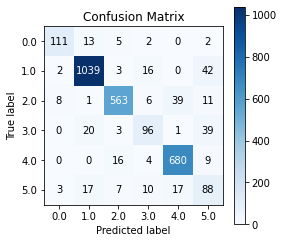

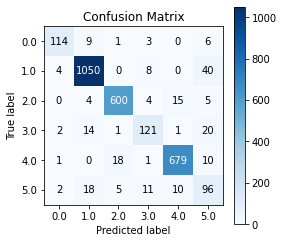

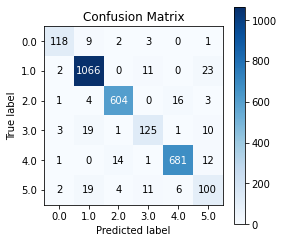

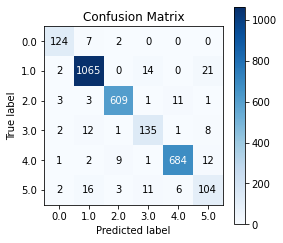

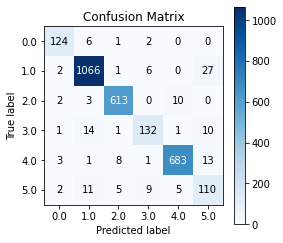

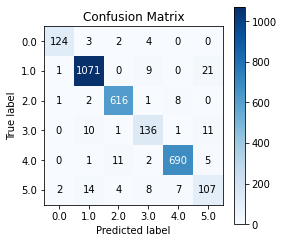

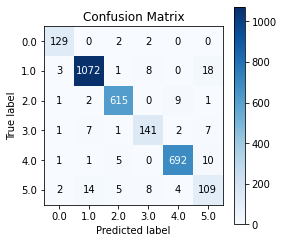

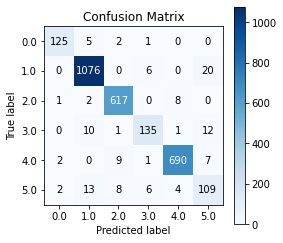

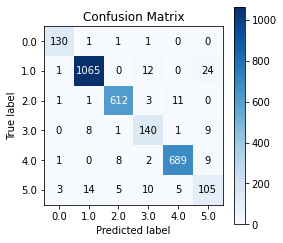

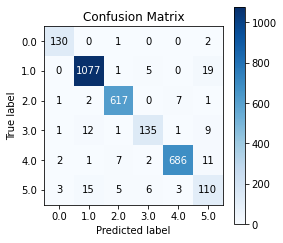

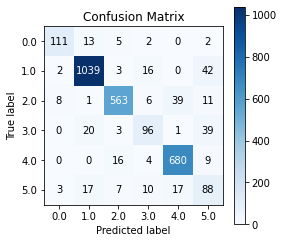

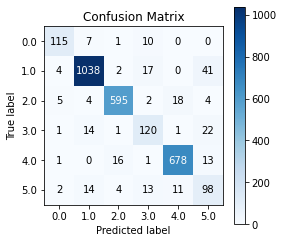

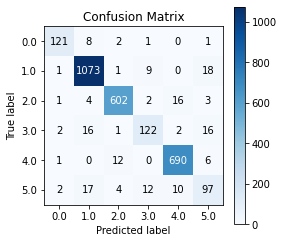

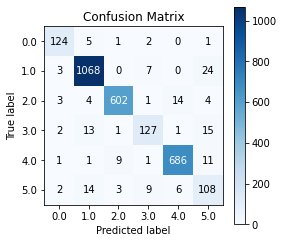

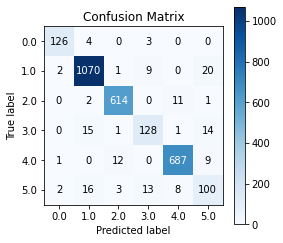

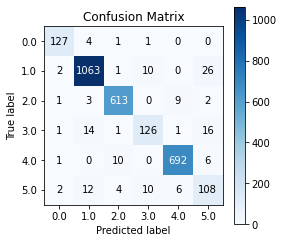

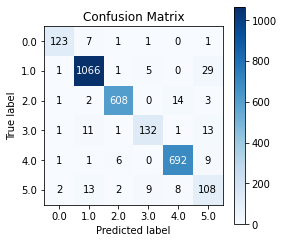

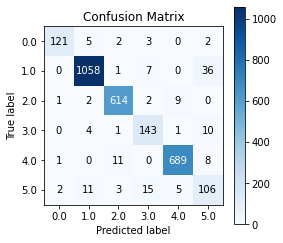

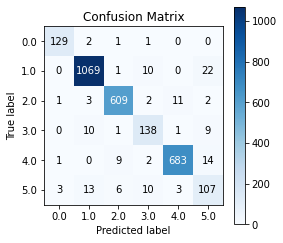

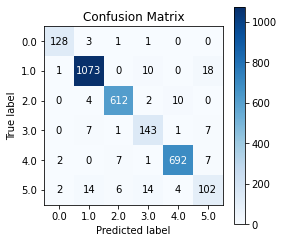

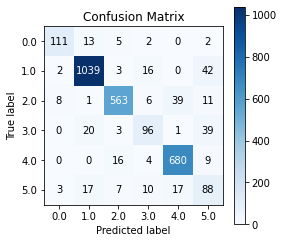

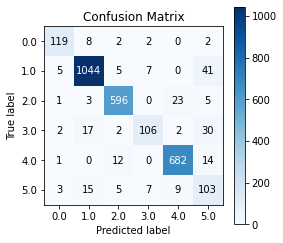

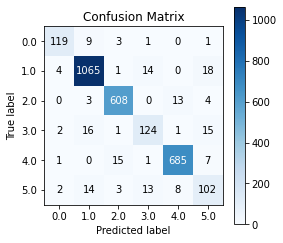

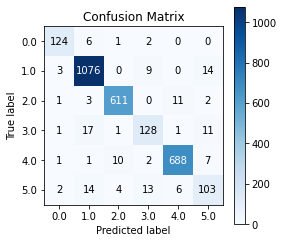

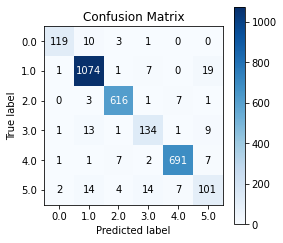

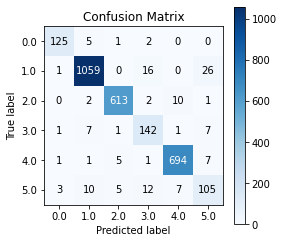

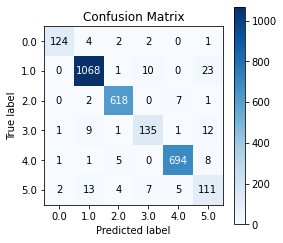

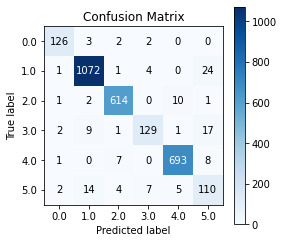

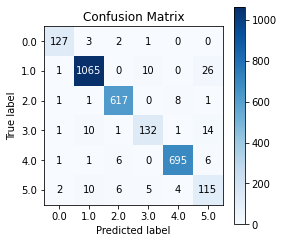

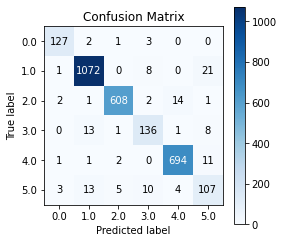

In [8]:
%%time
LIST_CRITERIA = ['en','ms', 'lc'] 
LIST_CEAL     = [True, True,True]
LIST_SAMPLES  = [500 , 500,500]


for CRITERIA,CEAL,SAMPLES in zip(LIST_CRITERIA,LIST_CEAL,LIST_SAMPLES):
    print(CRITERIA,CEAL,SAMPLES)

    BASE_IMG_DIR    = Path('/mnt/')
    SEED            = 42
    num_classes     = 6
    DELTA           = 0.02
    DELTA_RATIO     = 0.000033
    MAXIMUM_INTERATIONS = 10
    #MAXIMUM_INTERATIONS = int(10000/SAMPLES)
    BATCH_SIZE      = 32
    NUM_WORKERS     = 32
    MAX_EPOCHS      = 100
    LEARNING_RATE   = 1e-5
    FLG_RESET       = 0
    METRIC_MONITOR  = "val_avg_loss"
    MODE_METRIC     = 'min'
    RESNET_MODEL    = 'resnet50'
    DEVICE          = 'cuda'
    CLASSIFIER      = 'higher_modality'
    if CEAL:
        NAME_EXPERIMENT = f'Experiment_{CRITERIA}_CEAL_{str(CEAL)}_{RESNET_MODEL}_class_weights_{str(True)}_DELTA_{DELTA}'
    else:
        NAME_EXPERIMENT = f'Experiment_{CRITERIA}_CEAL_{str(CEAL)}_{RESNET_MODEL}_class_weights_{str(True)}'
    SAVE_AL_DATA    = os.path.join('../data/ActiveLearning',CLASSIFIER,str(SAMPLES),str(LEARNING_RATE),NAME_EXPERIMENT)
    OUTPUT_DIR      = os.path.join('/mnt/artifacts/active_learning',CLASSIFIER,NAME_EXPERIMENT)
    os.makedirs(SAVE_AL_DATA,exist_ok=True)
    os.makedirs(OUTPUT_DIR,exist_ok=True)
    # Save in a yaml file
    yaml_file = {
       'SEED'         : SEED,
        'CRITERIA'    : CRITERIA,
        'SAMPLES'     : SAMPLES,
        'CEAL'        : str(CEAL),
        'DELTA'       : DELTA,
        'DELTA_RATIO' : DELTA_RATIO,
        'MAXIMUM_INTERATIONS':MAXIMUM_INTERATIONS,
        'BATCH_SIZE'  : BATCH_SIZE,
        'MAX_EPOCHS'  : MAX_EPOCHS,
        'LEARNING_RATE' : LEARNING_RATE,
        'FLG_RESET_MODEL'  : FLG_RESET,
        'MODEL'       : RESNET_MODEL,
        'CLASSIFIER'  : CLASSIFIER
    }

    with open(os.path.join(SAVE_AL_DATA ,'training.yml'), 'w') as outfile:
        yaml.dump(yaml_file, outfile, default_flow_style=False)
    !rm -Rf $OUTPUT_DIR
    # 1. Initialization of the Training
    df = pd.read_csv('../data/higher_modality_active_learning.csv',sep = '\t')
    le_encoder,dict_label = label_encoder_target(df)
    !cp '../data/ActiveLearning/Dataset_Labeled_0.csv' $SAVE_AL_DATA
    !cp '../data/ActiveLearning/Dataset_Unlabeled_0.csv' $SAVE_AL_DATA
    DF_UL      = pd.read_csv(os.path.join(SAVE_AL_DATA,f'Dataset_Unlabeled_0.csv'),sep ='\t')
    df_metrics = pd.DataFrame()
    for it in range(MAXIMUM_INTERATIONS):
        print('*'*5,f' Iteration {it} ','*'*5)
        transform_mean_std =  transforms.Compose([
                                                     transforms.ToPILImage(),
                                                     transforms.Resize((224, 224)),
                                                     transforms.ToTensor()])

        train_dataset   = ImageDataset(os.path.join(SAVE_AL_DATA,f'Dataset_Labeled_{it}.csv'),
                                      le_encoder,
                                      str(BASE_IMG_DIR),
                                      'TRAIN',
                                      image_transform  = transform_mean_std,
                                      label_name       = CLASSIFIER,
                                      target_class_col = 'split_set',
                                      path_col         = 'img_path')

        df_ = pd.read_csv(os.path.join(SAVE_AL_DATA,f'Dataset_Labeled_{it}.csv'),sep = '\t')
        shape_train   = df_[df_['split_set']=='TRAIN'].shape[0]
        shape_labeled = df_[(df_['split_set']=='TRAIN')&(df_['Flag_PseudoLabeling']==0)].shape[0]
        shape_pseudo  = df_[(df_['split_set']=='TRAIN')&(df_['Flag_PseudoLabeling']==1)].shape[0]
        del df_
        print(f'Number of Training Samples: {shape_train}')
        mean, std =calc_dataset_mean_std(train_dataset, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)
        print(f"Mean of the Dataset: {mean}, Std of the Dataset: {std} ")

        # 2.2 Load the DataModule (Train,Val,Test dataloader)
        dm = ImageDataModule( batch_size       = BATCH_SIZE,
                              label_encoder    = le_encoder,
                              data_path        = os.path.join(SAVE_AL_DATA,f'Dataset_Labeled_{it}.csv'),
                              base_img_dir     = str(BASE_IMG_DIR),
                              seed             = SEED,   
                              image_transforms = [get_train_transf(mean,std),get_valid_transf(mean,std),get_valid_transf(mean,std)],
                              num_workers      = NUM_WORKERS,
                              target_class_col ='split_set',
                              modality_col     = CLASSIFIER,
                              path_col         ='img_path')
        dm.prepare_data()
        dm.setup()
        dm.set_seed()

        model = ResNetClass      (name            = RESNET_MODEL,
                                      num_classes     = num_classes,
                                      pretrained      = True,
                                      fine_tuned_from = 'whole',
                                      lr              = LEARNING_RATE,
                                      metric_monitor  = METRIC_MONITOR,
                                      mode_scheduler  = None,
                                      class_weights   = dm.class_weights,
                                      #class_weights   = None,
                                      mean_dataset    = mean,
                                      std_dataset     = std)

        if (it ==0)|(FLG_RESET == 1):
            a=1
        else:
            print('Loading last model ....')
            checkpoint = torch.load(os.path.join(OUTPUT_DIR,f'higher_modality_v{it-1}.pt'))
            model.load_state_dict(checkpoint['state_dict'])


        early_stop_callback = EarlyStopping(
                                            monitor   = METRIC_MONITOR,
                                            min_delta = 0.0,
                                            patience  = 5,
                                            verbose   = True,
                                            mode      = MODE_METRIC)

        checkpoint_callback = ModelCheckpoint(dirpath    = OUTPUT_DIR,
                                              filename   = f'higher_modality_v{it}',
                                              monitor    = METRIC_MONITOR,
                                              mode       = MODE_METRIC,
                                              save_top_k = 1,
                                              save_weights_only = True)
        checkpoint_callback.FILE_EXTENSION = ".pt"
        # 3.3 Setup Trainer
        trainer = Trainer(gpus=1,
                          max_epochs = MAX_EPOCHS,
                          callbacks=[checkpoint_callback,early_stop_callback],
                          deterministic= True,
                          logger = None,
                          num_sanity_val_steps=0)

        trainer.fit(model, dm)
        del model,trainer

        # 3.5 Evaluate on the Test Set (Save Metrics):
        model = ResNetClass.load_from_checkpoint(checkpoint_callback.best_model_path)
        trainer_test = Trainer(gpus=1, logger=None)
        trainer_test.test(model, test_dataloaders=dm.test_dataloader())
        del trainer_test

        # Save Metrics
        df_test = pd.read_csv(os.path.join(SAVE_AL_DATA,f'Dataset_Labeled_{it}.csv'),sep = '\t')
        df_test = df_test[df_test['split_set']=='TEST'].reset_index(drop = True)
        test_dataset = EvalImageDataset (df_test,image_transform=get_valid_transf(mean,std),path_col='img_path',base_img_dir = BASE_IMG_DIR)
        test_dataloader = DataLoader( dataset     = test_dataset,
                                      batch_size  = BATCH_SIZE,
                                      shuffle     = False,
                                      num_workers = NUM_WORKERS)

        acc,balanced_acc,macro_f1,macro_recall,macro_precision =run_metrics(le_encoder.transform(df_test.higher_modality),get_prediction(test_dataloader,model,'cuda'))


        # Get the idx for uncertainty and pseudo-labeling
        DF_UL_dataset    = EvalImageDataset (DF_UL,image_transform=get_valid_transf(mean,std),path_col='img_path',base_img_dir = BASE_IMG_DIR)
        DF_UL_dataloader = DataLoader(dataset     = DF_UL_dataset,
                                      batch_size  = BATCH_SIZE,
                                      shuffle     = False,
                                      num_workers = NUM_WORKERS)

        DF_UL_PROBS     = get_probs(DF_UL_dataloader,model.to(DEVICE),DEVICE)
        del model
        # Uncertainty: 
        DF_UL['en']   = calc_uncertainty(DF_UL_PROBS,criteria = 'en')
        # Calculate Index Uncertainty
        if CRITERIA == 'en':
            print('Using Entropy')
            DF_UL[CRITERIA]   = calc_uncertainty(DF_UL_PROBS,criteria = CRITERIA)
            idx_unc           = DF_UL.nlargest(SAMPLES,[CRITERIA]).index.to_numpy()     
        elif (CRITERIA =='ms')|(CRITERIA =='lc'):
            print('Using ms/lc')
            DF_UL[CRITERIA]   = calc_uncertainty(DF_UL_PROBS,criteria = CRITERIA)
            idx_unc           = DF_UL.nsmallest(SAMPLES,[CRITERIA]).index.to_numpy()     
        elif CRITERIA == 'rs':
            print('Using rs')
            idx_unc           = np.random.choice(range(len(DF_UL_PROBS)), SAMPLES)

        DF_UL_UNCERTAINTY = DF_UL.iloc[idx_unc,:].reset_index(drop = True)
        DF_UL_UNCERTAINTY['Flag_PseudoLabeling'] = 0
        print('Number of Human label samples: ',idx_unc.shape[0])
        # PseudoLabels
        idx_conf             = get_confidence_samples(DF_UL,DELTA)
        print('Number of PseudoLabels: ',len(list(set(idx_conf) - set(idx_unc))))
        if len(list(set(idx_conf) - set(idx_unc)))>0:
            DF_UL_PSEUDOLABELING = DF_UL.iloc[np.array(list(set(idx_conf) - set(idx_unc))),:].reset_index(drop = True)
            DF_UL_PSEUDOLABELING['higher_modality'] = le_encoder.inverse_transform(np.argmax(DF_UL_PROBS, axis=1))[np.array(list(set(idx_conf) - set(idx_unc)))] ## check this
            DF_UL_PSEUDOLABELING['Flag_PseudoLabeling']  = 1
            if CEAL:
                acc_pseudo = accuracy_score(DF_UL_PSEUDOLABELING['higher_modality'],DF_UL_PSEUDOLABELING['target'])
                print('Acc Pseudo: ' ,acc_pseudo)                   
            else:
                acc_pseudo = None
        else:
            acc_pseudo = None

        # save metrics
        df_act = pd.DataFrame({'Sample Method':[CRITERIA],
                               'CEAL':[CEAL],
                               'Iteration':[it],
                               'Labeled (%)':[np.round(100*shape_labeled/10059)],
                              '# Labeled Samples':[shape_labeled],
                              '# Pseudo Samples':[shape_pseudo],
                              'Accuracy':[acc],
                              'Balanced Accuracy':[balanced_acc],
                              'Macro F1-Score':[macro_f1],
                              'Macro Precision':[macro_precision],
                              'Macro Recall':[macro_recall],
                              'Accuracy PseudoLabeling':[acc_pseudo]})
        df_metrics = pd.concat([df_metrics,df_act],axis = 0)
        df_metrics.to_csv(os.path.join(SAVE_AL_DATA,'metrics.csv'),sep = '\t',index = False)


        # ELiminate from the Unlabeled Dataset
        DF_UL.drop(df.index[list(idx_unc)], inplace=True)
        DF_UL = DF_UL.reset_index(drop = True)

        # New Labeled dataset
        if CEAL :
            print('Using CEAL algorithm')
            DF_NEW = pd.concat([DF_UL_UNCERTAINTY,DF_UL_PSEUDOLABELING],axis = 0).reset_index(drop = True)    
        else:
            DF_NEW = DF_UL_UNCERTAINTY.reset_index(drop = True)
        DF_LABELED = pd.read_csv(os.path.join(SAVE_AL_DATA,f'Dataset_Labeled_{it}.csv'),sep ='\t')
        DF_LABELED = DF_LABELED[DF_LABELED['Flag_PseudoLabeling']==0].reset_index(drop = True)
        DF_LABELED = pd.concat([DF_LABELED,DF_NEW],axis = 0).reset_index(drop = True)
        DF_LABELED.to_csv(os.path.join(SAVE_AL_DATA,f'Dataset_Labeled_{it+1}.csv'),index = False,sep = '\t')

        DELTA = DELTA - DELTA_RATIO
        print(f'DELTA: {DELTA}' )